In [182]:
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
from transform_factory import resize_322, center_crop_224
from captum.attr import visualization as viz

In [183]:
seed = 0
expl_method = "LayerXAct"
data_num = 1

In [184]:
with open(f"./val_seed_{seed}.npy", "rb") as f:
    filepath_list = np.load(f)

for filepath in filepath_list[data_num:data_num+1]:
    print(filepath)
    img_name = os.path.basename(filepath)
    print(img_name)

    results_path = f"results/val_seed_{seed}_pred_orig_eval_orig_transform_both_sign_all_reduction_sum/{img_name}_expl_{expl_method}_sample_2000_sigma_0.05_seed_{seed}_results.pkl"

    # results_path = f"results/val_seed_{seed}_pred_orig_eval_orig_transform_both_sign_all_reduction_sum/{img_name}_expl_{expl_method}_sample_2000_sigma_0.05_seed_{seed}_results.pkl"

    with open(results_path, "rb") as f:
        results = np.load(f, allow_pickle=True)

/home/juhyeon/Imagenet/val/n04127249/ILSVRC2012_val_00024718.JPEG
ILSVRC2012_val_00024718.JPEG


In [185]:
for res in results:
    print(res['zero_contain_rate'])

0.4694076849489796
0.40122767857142855
0.34139827806122447
0.28976004464285715
0.24990035076530612
0.21512276785714285
0.19007095025510204
0.1715361926020408
0.15674824617346939
0.14520886479591838
0.13251355229591838
0.11870216836734694
0.10505022321428571
0.09107940051020408
0.0791015625
0.06479193239795919
0.046376753826530615
0.02939652423469388
0.014528858418367346


tensor(0.9506)


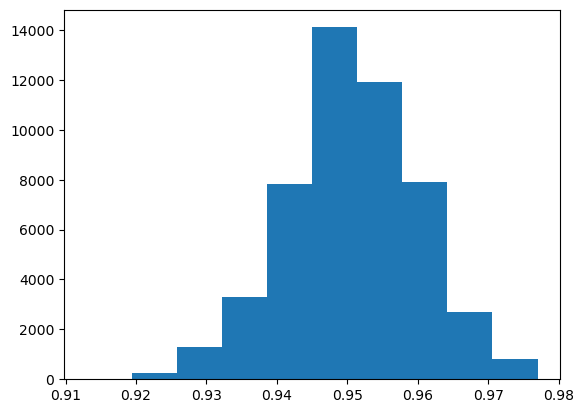

In [186]:
plt.hist(results[0]['coverage_prob'].flatten())
# plt.xlim(0, 1, 0.05)

print(results[0]['coverage_prob'].flatten().mean())

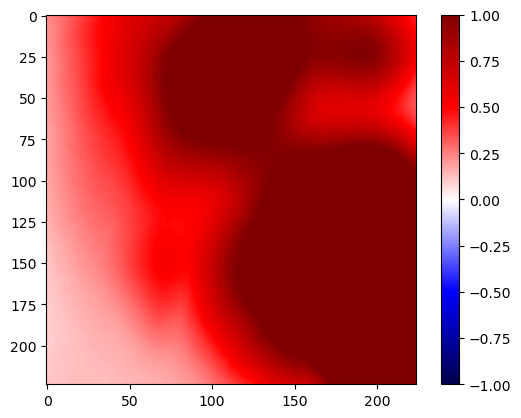

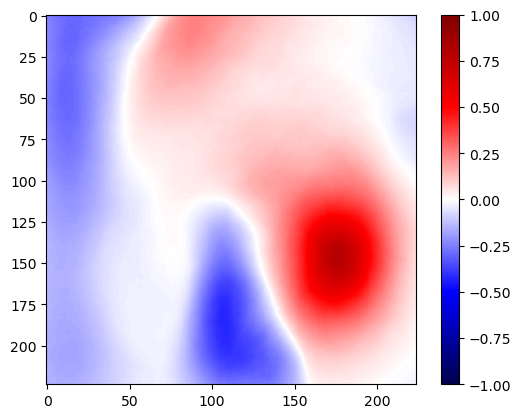

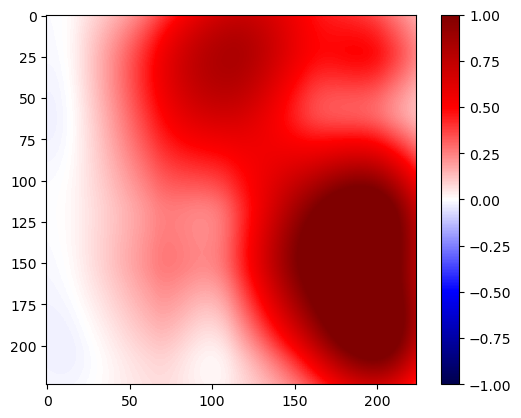

In [187]:
plt.imshow(results[0]['conf_high'].squeeze(), cmap="seismic")
plt.clim(-1, 1)
plt.colorbar()
plt.show()

plt.imshow(results[0]['conf_low'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()

plt.imshow(results[0]['orig_expl'].squeeze(), cmap="seismic")
plt.clim(-1, 1)

plt.colorbar()
plt.show()


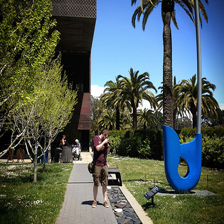

In [189]:
center_crop_224(resize_322(Image.open(filepath_list[data_num])))


(array([ 3406.,  4991.,  6773., 12437.,  7635.,  5989.,  3801.,  1935.,
         1718.,  1491.]),
 array([0.05275429, 0.21840647, 0.38405865, 0.54971081, 0.71536303,
        0.88101518, 1.04666734, 1.21231949, 1.37797177, 1.54362392,
        1.70927608]),
 <BarContainer object of 10 artists>)

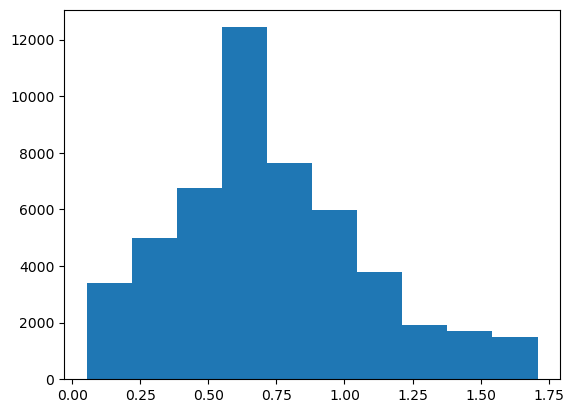

In [168]:
plt.hist(abs(results[0]['conf_high'] - results[0]['conf_low']).flatten())